CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW2:  The Distribution of Movie Ratings

Movie ratings are numeric scores summarizing the quality of a movie.
In this assignment, we study two sources of ratings:
<ul><li>
up-to-date, recently tweeted movie ratings (from MovieTweetings)
</li><li>
historical movie rating averages (from IMDb).
</li></ul>

Ratings from both of these sources are numeric values, ranging from 0 to 10.

Perhaps remarkably, the distribution for the two kinds of ratings look the same.
The goal of this assignment is to characterize the movie ratings distribution.

<blockquote>
<i style="color:blue;">
Your program is supposed to produce an output file answering four sets of questions
(10 questions in all):
<ul><li>
characterizing the distribution of live MovieTweetings movie ratings
</li><li>
studying the differences between average and median MovieTweetings ratings.
</li><li>
characterizing the distribution of archival IMDb movie ratings
</li><li>
analyzing skewness of the Gamma distribution.
</li></ul>
</i>
</blockquote>
The details of these questions are laid out in the notebook.
And as it explains, your program should produce a CSV file <tt>HW2_output.csv</tt> answering the questions.
A correct output file could look like this:
<pre>
     lognormal,5.55555,1.11111
     skewness,2.22222,
     kurtosis,3.33333,
     Batman: The Dark Knight,3.33333,8.88888
     Batman v Superman: Dawn of Justice,9.11111,9.55555
     lognormal,5.22222,1.44444
     skewness,2.55555,
     kurtosis,3.44444,
     1,,
     False,,
</pre>
This is just an example of the format of an output file; your output file will be different.


This file characterizes the distribution of ratings as a <i>lognormal distribution</i>.
This is not correct: the ratings distribution clearly cannot be lognormal,
because it is <i>negatively skewed</i> (it leans to the right)
whereas the lognormal distribution is <i>positively skewed</i> (it leans to the left).

Another distribution is needed.
The notebook suggests two possible distributions, but you job is to identify one,
and obtain the best fit (i.e., maximal likelihood parameters) for the data.


The notebook does not give as much guidance as the earlier assignment notebooks.
However, this is also a short assignment.

To complete this assignment, please upload two files to CCLE:
<br/>
<ul><li>
your output CSV file <tt>HW2_output.csv</tt>
</li><li>
your notebook file <tt>HW2_Movie_Ratings.ipynb</tt> (to show your work).
</li></ul>
<br/>
The notebook should have the commands you used to produce the output file.
All assignment grading in this course will be automated, so please assume that when uploading files.

We will use Paul Eggert's <b>Late Policy</b>:
The number of days late is $N=0$ for the first 24 hrs, $N=1$ for the next 24 hrs, etc.,
and if you submit an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are deducted.

# Part 1:  Live Movie Ratings -- extracted from Tweets

## Live Movie Ratings are available at GitHub

These ratings are updated automatically online by a process scanning current Tweets;
see the <a href="https://github.com/sidooms/MovieTweetings">Movie Tweetings</a> page of
<a href="https://scholar.google.be/citations?user=owaD8qkAAAAJ&hl=en">Simon Dooms</a>.
The information in the tweets has been digested into three tables -- about movies, users, and ratings.
(Up-to-date snapshots and archives are also available.)

In [1]:
# bypass a problem with R reading of https connections
remote.file = function(URL) {
    temporaryFile <- tempfile()
    download.file(URL,destfile=temporaryFile, method="curl")
    return( temporaryFile )
}

In [2]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"

Ratings = read.table( remote.file(URL), sep = ":", header=FALSE )[,c(1,3,5,7)]
colnames(Ratings) = c("UserID", "MovieID", "Rating", "TwitterID")

head(Ratings)

# if your connection to github fails when retrieving this dataset, persist in trying

,UserID,MovieID,Rating,TwitterID
1,1,68646,10,1381620027
2,1,113277,10,1379466669
3,2,422720,8,1412178746
4,2,454876,8,1394818630
5,2,790636,7,1389963947
6,2,816711,8,1379963769


In [3]:
dim(Ratings)  # not a tiny dataset

[1] 491452      4

## Exploration of the Live Ratings

In [4]:
# Summary statistics

summary( Ratings$Rating )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.000   7.000   7.303   9.000  10.000 

In [5]:
# Count rating values with table()

CountOfRatings = as.data.frame(table( Ratings$Rating, dnn="rating" ), responseName="count")
CountOfRatings

,rating,count
1,0,95
2,1,5862
3,2,5137
4,3,8672
5,4,16184
6,5,35100
7,6,64474
8,7,110409
9,8,119135
10,9,69701


In [6]:
options( repr.plot.width=4, repr.plot.height=4 ) # control plot dimensions

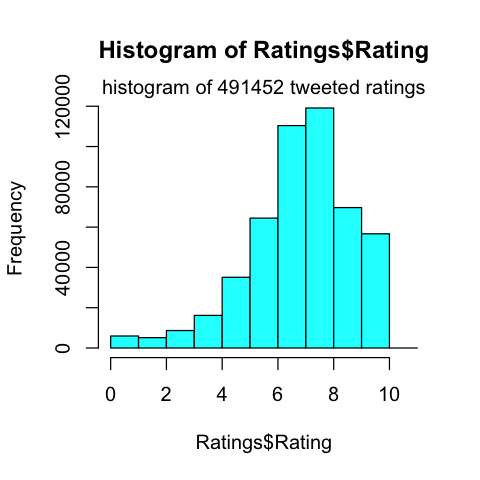

In [7]:
# Histogram of Rating values (integer values from 0 to 10)

h = hist( Ratings$Rating, breaks = 0:11, col="cyan" )  # save and plot the histogram

mtext( sprintf("histogram of %d tweeted ratings", length(Ratings$Rating)) )

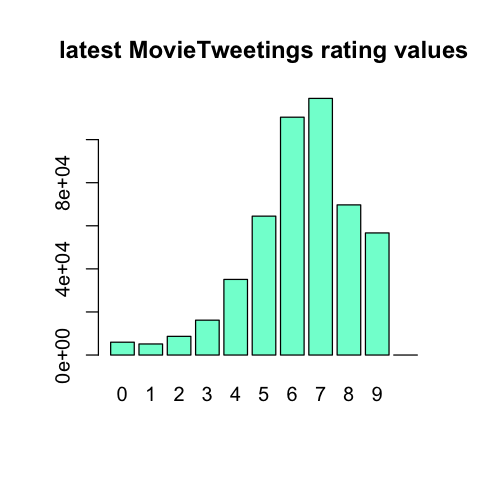

In [8]:
barplot( h$counts, names.arg=0:10, col="aquamarine",
        main="latest MovieTweetings rating values" )

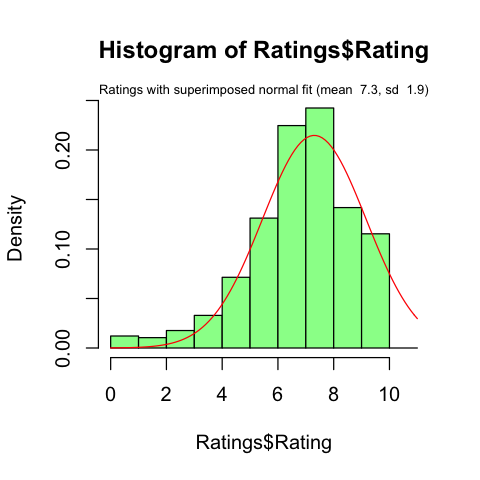

In [9]:
hist( Ratings$Rating, probability=TRUE, col="palegreen", breaks=0:11 )

rating_avg = mean(Ratings$Rating)
rating_sd  = sd(Ratings$Rating)

curve( dnorm(x, mean=rating_avg, sd=rating_sd),
      col="red", add=TRUE )  #  add a curve with the normal MLE

mtext(sprintf("Ratings with superimposed normal fit (mean %4.1f, sd %4.1f)",
              rating_avg, rating_sd), cex=0.65)

# Problem 1: Find a distribution that fits the histogram of MovieTweetings Rating values

<p style="color:blue;">
<ul><li>
<b>Question 1:</b>  <b>Give the name of a specific distribution (pdf), with maximum likelihood parameter values, that resembles the MovieTweetings Rating values (as closely as you can).</b>
<br/><br/>
To permit distributions like the Beta distribution to be considered,
you can scale the rating values.
For example, dividing the values by 10 puts them in the interval [0,1],
as the Beta distribution requires.
<br/><br/>
</li><li>
<b>Question 2:</b> determine the <a href="https://en.wikipedia.org/wiki/Skewness"><b>skewness</b></a> of the MovieTweetings ratings.
<br/><br/>
</li><li>
<b>Question 3:</b> determine the (excess) <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>kurtosis</b></a> of the MovieTweetings ratings.
</li></ul>
<br/><br/>
The skewness and excess kurtosis values ought to be near zero
if the data is normally distributed.
Inspecting them is a simple check of whether the data follows a normal distribution.
</p>

## You can use the fitdistr() function in this assignment

In [10]:
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])
if (not.installed("MASS")) install.packages("MASS")

library(MASS)

# example(fitdistr)  #  run examples showing use of the fitdistr() function

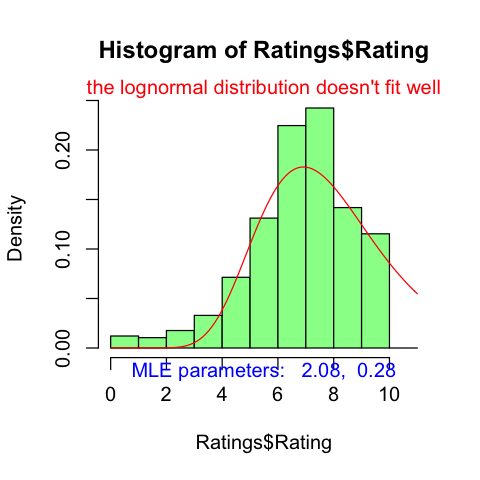

In [11]:
# A start at analysis, which needs work:

hist( Ratings$Rating, probability=TRUE, col="palegreen", breaks=0:11 )

theta = fitdistr( Ratings$Rating+1, "lognormal" )

curve( dlnorm(x+0.5, meanlog=theta$estimate[1], sdlog=theta$estimate[2]),
      col="red", add=TRUE )  #  add a curve with the MLE fit for the lognormal density

mtext( "the lognormal distribution doesn't fit well", col="red" )
mtext( sprintf("MLE parameters:  %5.2f, %5.2f",
               theta$estimate[1], theta$estimate[2]), side=1, col="blue")

### Problem 1 - Question 1

[1] 491452

[1]  0.01502184 10.99998281

[1] 0.001365622 0.999998437

Dataset is nonnegative
normal 0.709414339489725 0.170912376753637
               log-likelihood = 170861.021903
t 0.720460947096591 0.147708368681072 7.72747257989182
               log-likelihood = 177099.983801
chi-squared 1.5070271035683
               log-likelihood = -482546.409927
lognormal -0.383815480816474 0.318890243368633
               log-likelihood = 52971.275547
exponential 1.40961345765761
               log-likelihood = -322728.899443
gamma 12.5102566389213 17.6346372299343
               log-likelihood = 105577.021154
logistic 0.720661464854305 0.0944716103671471
               log-likelihood = 177039.387328
beta 3.83515035184694 1.57006882349046
               log-likelihood = 193963.436814
weibull 5.00013426483781 0.772130636729446
               log-likelihood = 180463.003679


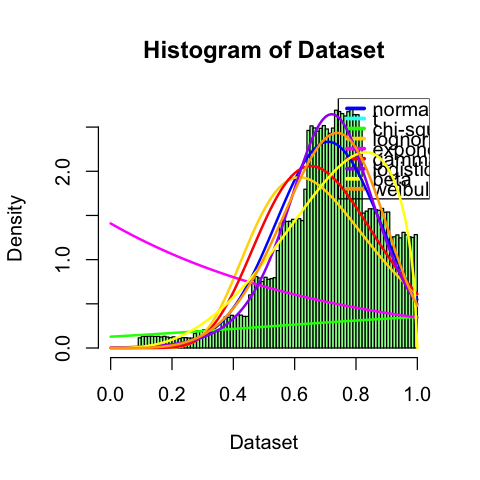

In [12]:
# include other distributions here
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic",
    "beta",
    "weibull"
)
Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE,
    FALSE,
    FALSE
)
Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis,
    dbeta,
    dweibull
)

Distribution_color = c(
     "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple",
    "yellow",
    "orange"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue",   lwd=2, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan",   lwd=2, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green",  lwd=2, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ),   col="gold",   lwd=2, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),           col="magenta",lwd=2, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),   col="red",    lwd=2, add=TRUE )
    if (dist_name == "logistic" )   curve( dlogis(x, p[1], p[2] ),   col="purple", lwd=2, add=TRUE )
    if (dist_name == "beta" )       curve( dbeta(x, p[1], p[2]  ),   col="yellow", lwd=2, add=TRUE )
    if (dist_name == "weibull" )    curve( dweibull(x, p[1], p[2] ), col="orange", lwd=2, add=TRUE )
}

n = length(Ratings$Rating)  #  These ratings are integers between 0 and 10, inclusive
n
 
UnroundedRatings = Ratings$Rating + runif(n)
range(UnroundedRatings)
#  The range of (Ratings + UniformNoise) should be the open interval (0,11)
 
RescaledRatings = UnroundedRatings / 11.0
 
#hist( RescaledRatings, probability=TRUE, col="palegreen", breaks=seq(0,1, by=0.01) )
range(RescaledRatings)
# These range of these rescaled ratings should be the open interval (0,1)
        

Dataset = RescaledRatings  

    
Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }
    
    Dataset_is_between_0and1 = !any(Dataset < 0 ) && !any(Dataset > 1 )
    if (!Dataset_is_between_0and1){
        cat("Dataset is not between 0 and 1\n")
    }
    

    hist( Dataset, probability=TRUE, col="palegreen", breaks=seq(0,1, by=0.01))
    
    # display a histogram for each column Dataset
    
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )
    
    dist_name_test = Distribution_name[1]
    if (Distribution_can_have_negative_values[1] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative


            if (dist_name_test == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name_test,
                                                 list(df=2), method="BFGS" ) )
            }
            else if(dist_name_test == "beta"){
                if (Dataset_is_between_0and1){
                    fit = suppressWarnings( fitdistr( Dataset, dist_name, start=list(shape1=1, shape2=1)) )
                }
            }
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name_test ) )
            }
    
    fitted_parameters_test = fit$estimate
    log_likelihood_test = fit$loglik
    parameter_value_string = paste(round(fitted_parameters_test), collapse=" ")
    parameters_test = fitted_parameters_test
    x1=round(parameters_test[0], 5)
    x2=round(parameters_test[1], 5)
    x3=round(parameters_test[2], 5)
    }
    
    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                                 list(df=2), method="BFGS" ) )
            } 
            else if(dist_name == "beta" ){
                if (Dataset_is_between_0and1){
                    fit = suppressWarnings( fitdistr( Dataset, dist_name, start=list(shape1=1, shape2=1)) )
                }
                    
            }
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste((fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
            parameters = fitted_parameters
            log_likelihood = round(log_likelihood)
              if (log_likelihood>log_likelihood_test){
                log_likelihood_test = log_likelihood
                dist_name_test = dist_name
                                x1=round(parameters[0], 5)
                x2=round(parameters[1], 5)
                x3=round(parameters[2], 5)
                x4=round(parameters[3], 5)
                if (is.na(x3)){
                    x3 = " "
                }
                if(is.na(x4)){
                    x4 = " "
                }
            }
            
        }
    }
Table2 = cbind( dist_name_test, x1, x2, x3, x4)
write.table(Table2, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

### Problem 1 - Question 2 

In [13]:
#install.packages('moments', dependencies=TRUE, repos='http://cran.rstudio.com/')
library(moments)
skew1 = skewness(Ratings$Rating, na.rm = FALSE)
skew1 = round(skew1, 5)
skew1
Skewness = cbind( "skewness", skew1)
write.table(Skewness, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

[1] -0.83429

### Problem 1 - Question 3

In [14]:
kurt1 = kurtosis(Ratings$Rating, na.rm = FALSE)
kurt1 = kurt1-3
kurt1 = round(kurt1, 5)
kurt1
Kurtosis = cbind( "kurtosis", kurt1)
write.table(Kurtosis, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

[1] 0.97456

## "Trending" Movies:  movies with more than 50 current ratings

In [15]:
NumberOfRatings = data.frame(aggregate( Rating ~ MovieID, length, data=Ratings ))
colnames(NumberOfRatings) = c("MovieID", "NumberOfRatings")

TrendingMovies = subset( NumberOfRatings, NumberOfRatings > 50 )

head(TrendingMovies)

,MovieID,NumberOfRatings
225,21749,52
235,22100,51
451,27977,60
555,31381,87
590,32138,61
655,33467,83


In [16]:
nrow(TrendingMovies)

[1] 1624

In [17]:
max(TrendingMovies$NumberOfRatings)

[1] 2952

## Averaged Ratings of Trending Movies

In [18]:
RatingsOfTrendingMovies = merge( Ratings, TrendingMovies, by="MovieID" )  # join of tables
head(RatingsOfTrendingMovies)

,MovieID,UserID,Rating,TwitterID,NumberOfRatings
1,21749,31733,7,1411560342,52
2,21749,23184,10,1369431057,52
3,21749,14803,10,1408217153,52
4,21749,12736,10,1460754146,52
5,21749,13801,10,1397268233,52
6,21749,39198,8,1373123660,52


,MovieID,Rating
1,21749,8.730769
2,22100,8.529412
3,27977,8.633333
4,31381,8.804598
5,32138,8.721311
6,33467,8.662651


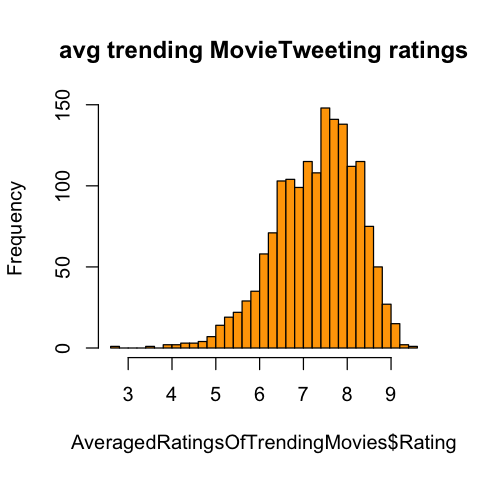

In [19]:
AveragedRatingsOfTrendingMovies = aggregate( Rating ~ MovieID, mean, data=RatingsOfTrendingMovies )
head(AveragedRatingsOfTrendingMovies)

hist(AveragedRatingsOfTrendingMovies$Rating, breaks=25,
     col="orange", main="avg trending MovieTweeting ratings")

In [20]:
maxAveragedRating = max(AveragedRatingsOfTrendingMovies$Rating)
maxAveragedRating

[1] 9.436496

# Download the corresponding MovieTweetings movie Name &amp; Genre information

In [21]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
MovieText = readLines( remote.file(URL) )
Movies = matrix( sapply( MovieText,
                function(x) unlist(strsplit(sub(" [(]([0-9]+)[)]", "::\\1",x),"::"))[1:4] ),
                nrow=length(MovieText), ncol=4, byrow=TRUE )
colnames(Movies) = c("MovieID", "MovieTitle", "Year", "Genres")

head(Movies)

MovieID,MovieTitle,Year,Genres
0000008,Edison Kinetoscopic Record of a Sneeze,1894,Documentary|Short
0000010,La sortie des usines Lumière,1895,Documentary|Short
0000012,The Arrival of a Train,1896,Documentary|Short
0000091,Le manoir du diable,1896,Short|Horror
0000417,Le voyage dans la lune,1902,Short|Adventure|Fantasy
0000439,The Great Train Robbery,1903,Short|Action|Crime


## joining the Ratings and Trending Movie information

In [22]:
Ratings_and_Movies = merge( RatingsOfTrendingMovies, Movies, by="MovieID" )

head(Ratings_and_Movies)

,MovieID,UserID,Rating,TwitterID,NumberOfRatings,MovieTitle,Year,Genres
1,1001526,18464,8,1440953420,59,Megamind,2010,Animation|Action|Comedy
2,1001526,5436,7,1383981834,59,Megamind,2010,Animation|Action|Comedy
3,1001526,30479,6,1391912795,59,Megamind,2010,Animation|Action|Comedy
4,1001526,20883,8,1402323417,59,Megamind,2010,Animation|Action|Comedy
5,1001526,15718,7,1388871992,59,Megamind,2010,Animation|Action|Comedy
6,1001526,24539,7,1394732974,59,Megamind,2010,Animation|Action|Comedy


In [23]:
HotTrendingMovies = subset(AveragedRatingsOfTrendingMovies, Rating == maxAveragedRating)
HotTrendingMovies

,MovieID,Rating
191,111161,9.436496


# Problem 2:  Compare Average vs. Median Rating values for Trending Movies

<p style="color:blue;">
After computing Average and Median Rating values for each Trending Movie in the MovieTweetings data:
<ul style="color:blue;"><li>
<b>Question 4:</b> find the <b>name of the movie with the highest Average Rating</b> (and also list its Median Rating and Average Rating).
If there is more than one such movie, select any one.
<br/><br/>
</li><li>
<b>Question 5:</b> find the <b>name of the movie with the largest difference |Median Rating - Average Rating|</b> (and also list its Median Rating and Average Rating).
If there is more than one such movie, select any one.
</li></ul>
</p>
<p style="color:blue;">For describing a skewed distribution, the median can be more informative than the mean.
</p>

### Problem 2 - Question 4

In [24]:
NumberOfRatings = data.frame(aggregate( Rating ~ MovieID, length, data=Ratings ))
colnames(NumberOfRatings) = c("MovieID", "NumberOfRatings")
TrendingMovies = subset( NumberOfRatings, NumberOfRatings > 50 )

RatingsOfTrendingMovies = merge( Ratings, TrendingMovies, by="MovieID" )  # join of tables

AveragedRatingsOfTrendingMovies = aggregate( Rating ~ MovieID, mean, data=RatingsOfTrendingMovies )
maxAveragedRating = max(AveragedRatingsOfTrendingMovies$Rating)

MedianRatings = aggregate( Rating ~ MovieID, median, data=RatingsOfTrendingMovies)


HotTrendingMovies = subset(AveragedRatingsOfTrendingMovies, Rating == maxAveragedRating)
HotTrendingMovies

Movies = data.frame(Movies)
Movies$MovieID = as.numeric(as.character(Movies$MovieID))


MovieHighestAverageRating =  Movies[Movies["MovieID"] == HotTrendingMovies$MovieID]
MovieHighestAverageRating

MovieHighestAverageRating_Median = subset(MedianRatings, MedianRatings$MovieID == HotTrendingMovies$MovieID)
MovieHighestAverageRating_Median

Table = cbind(MovieHighestAverageRating[2], round(MovieHighestAverageRating_Median$Rating, 5), round(maxAveragedRating, 5))

write.table(Table, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

,MovieID,Rating
191,111161,9.436496


[1] " 111161"                  "The Shawshank Redemption"
[3] "1994"                     "Crime|Drama"

,MovieID,Rating
191,111161,10


### Problem 2 - Question 5

In [25]:
AveragedRatingsOfTrendingMovies = aggregate( Rating ~ MovieTitle, mean, data=Ratings_and_Movies )
#head(AveragedRatingsOfTrendingMovies)

#maxAveragedRating = max(AveragedRatingsOfTrendingMovies$Rating)

MedianRatingsOfTrendingMovies = aggregate( Rating ~ MovieTitle, median , data=Ratings_and_Movies)
#head(MedianRatingsOfTrendingMovies)

AveragedMedianRatingsOfTrendingMovies = merge( MedianRatingsOfTrendingMovies, AveragedRatingsOfTrendingMovies, by="MovieTitle" )  # join of tables
colnames(AveragedMedianRatingsOfTrendingMovies) = c("MovieTitle", "MedianRating", "AverageRating")
#head(AveragedMedianRatingsOfTrendingMovies)

MaxDifferenceRating = max(abs((AveragedMedianRatingsOfTrendingMovies$MedianRating)-(AveragedMedianRatingsOfTrendingMovies$AverageRating)))
MaxDifferenceRating

MovieHighestDifferenceRating = subset(AveragedMedianRatingsOfTrendingMovies, (MedianRating - AverageRating) == MaxDifferenceRating)
MovieHighestDifferenceRating$MedianRating = round(MovieHighestDifferenceRating$MedianRating, 5)
MovieHighestDifferenceRating$AverageRating = round(MovieHighestDifferenceRating$AverageRating, 5)

write.table(MovieHighestDifferenceRating, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

[1] 2.433628

# Part 2.  Historical Movie Ratings -- from IMDb

In this part we analyze an historical dataset of movies with ratings from IMDb.

In [26]:
#  source is at: https://github.com/hadley/ggplot2movies

if (not.installed("ggplot2movies")) install.packages("ggplot2movies")

library(ggplot2movies)

data(movies)

dim(movies)  # also not a tiny dataset

[1] 58788    24

In [27]:
summary(movies)

?movies

    title                year          length            budget         
 Length:58788       Min.   :1893   Min.   :   1.00   Min.   :        0  
 Class :character   1st Qu.:1958   1st Qu.:  74.00   1st Qu.:   250000  
 Mode  :character   Median :1983   Median :  90.00   Median :  3000000  
                    Mean   :1976   Mean   :  82.34   Mean   : 13412513  
                    3rd Qu.:1997   3rd Qu.: 100.00   3rd Qu.: 15000000  
                    Max.   :2005   Max.   :5220.00   Max.   :200000000  
                                                     NA's   :53573      
     rating           votes                r1                r2        
 Min.   : 1.000   Min.   :     5.0   Min.   :  0.000   Min.   : 0.000  
 1st Qu.: 5.000   1st Qu.:    11.0   1st Qu.:  0.000   1st Qu.: 0.000  
 Median : 6.100   Median :    30.0   Median :  4.500   Median : 4.500  
 Mean   : 5.933   Mean   :   632.1   Mean   :  7.014   Mean   : 4.022  
 3rd Qu.: 7.000   3rd Qu.:   112.0   3rd Qu.:  4.500   3

movies {ggplot2movies},R Documentation


In [28]:
colnames(movies)

[1] "title"       "year"        "length"      "budget"      "rating"     
 [6] "votes"       "r1"          "r2"          "r3"          "r4"         
[11] "r5"          "r6"          "r7"          "r8"          "r9"         
[16] "r10"         "mpaa"        "Action"      "Animation"   "Comedy"     
[21] "Drama"       "Documentary" "Romance"     "Short"

In [29]:
head(movies)

,title,year,length,budget,rating,votes,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
1,$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,14.5,24.5,24.5,14.5,4.5,4.5,,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,NA,6,20,0,14.5,4.5,24.5,14.5,14.5,14.5,4.5,4.5,14.5,,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,NA,8.2,5,0,0,0,0,0,24.5,0,44.5,24.5,24.5,,0,1,0,0,0,0,1
4,"$40,000",1996,70,NA,8.2,6,14.5,0,0,0,0,0,0,0,34.5,45.5,,0,0,1,0,0,0,0
5,"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0,14.5,14.5,4.5,0,0,0,24.5,,0,0,0,0,0,0,0
6,$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,14.5,14.5,4.5,4.5,14.5,14.5,,0,0,0,1,0,0,0


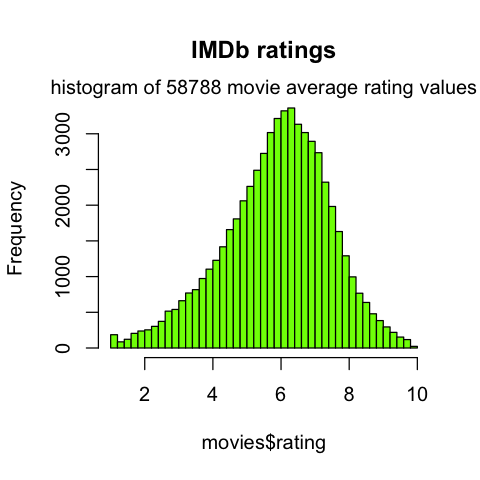

In [30]:
hist( movies$rating, col="lawngreen", main="IMDb ratings", breaks=50 )

mtext( sprintf("histogram of %d movie average rating values", nrow(movies)) )

# Problem 2: Find a distribution that fits the histogram of IMDb Ratings

<p style="color:blue;">
<ul><li>
<b>Question 6:</b> <b>Give the name of a specific distribution (pdf), with maximum likelihood parameter values, that resembles the IMDb Rating values (as closely as you can).</b>
<br/><br/>
Again, to permit distributions like the Beta distribution to be considered,
you can scale the rating values.
For example, dividing the values by 10 puts them in the interval [0,1],
as the Beta distribution requires.
<br/><br/>
</li><li>
<b>Question 7:</b> determine the <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>skewness</b></a> of the IMDb ratings.
<br/><br/>
</li><li>
<b>Question 8:</b> determine the (excess) <a href="https://en.wikipedia.org/wiki/Kurtosis"><b>kurtosis</b></a> of the IMDb ratings.
</li></ul>
<br/><br/>
</p>

## Possibilities:  the Extreme Value Distribution, or related distributions

<p style="color:blue;">
The <a href="http://wikipedia.org/en/Generalized_extreme_value_distribution">(Smallest) Extreme Value Distribution</a>
models the minimum of a set of values drawn from a single distribution.
It is sometimes used for modeling sets of identical independent processes
that can <i>fail</i> -- and the time of the first failure is the failure time of the entire set.
<br/><br/>
In other words, the distribution models the failure time of the <i>weakest link</i>.
<br/><br/>
The Extreme Value Distribution
is related to the <a href="http://wikipedia.org/en/Weibull_distribution">Weibull Distribution</a>.
</p>

## Possibility:  the Beta Distribution

<p style="color:blue;">
The <a href="http://wikipedia.org/en/Beta_distribution">Beta distribution</a>
is a general model for random values of percentages and proportions.
It is used very heavily in Bayesian methods.
<br/><br/>
The distribution Beta($\alpha$,$\beta$) leans to the right (like the data) when $\alpha > \beta$.
<br/><br/>
Note: As mentioned above, movie rating values are in the interval [0,10] ...
The Beta distribution requires all values to be nonnegative, and in the interval [0,1].
Thus the ratings would need to be rescaled here.
<br/><br/>
<b>Warning:</b>  the <tt>fitdistr()</tt> function appears to be fragile when fitting a beta distribution.
If you consider the Beta distribution, obtaining MLE parameter values may require a different method.
</p>

## Not a Possibility:  the Negative Gamma Distribution

<p style="color:blue;">
The <b>Negative Gamma distribution</b>
is a "mirror image" of the  <a href="http://wikipedia.org/en/Gamma_distribution">Gamma Distribution</a>,
defined for $x < 0$ instead of $x > 0$.
In other words, the value of the Negative Gamma distribution at $-x$
is defined to be the value of the Gamma distribution at $+x$.
Do not consider it in this assignment.
</p>

### Problem 2 - Question 6

[1] 58788

[1]  1.000357 10.785303

[1] 0.09094154 0.98048213

Dataset is nonnegative
normal 0.584707293697141 0.143497005514337
               log-likelihood = 30716.881573
t 0.586045909983238 0.1397015959739 37.8830061101753
               log-likelihood = 30735.043255
chi-squared 1.36793058776766
               log-likelihood = -50916.306276
lognormal -0.573167189270394 0.287939041565797
               log-likelihood = 23470.235325
exponential 1.71025744125225
               log-likelihood = -27239.777841
gamma 13.8554131794654 23.696359178393
               log-likelihood = 26837.196536
logistic 0.590625651204575 0.0812858711248824
               log-likelihood = 30456.040018
beta 6.2010670782551 4.42071486491259
               log-likelihood = 30905.043805
weibull 4.71467404266347 0.638942517497075
               log-likelihood = 31360.649824


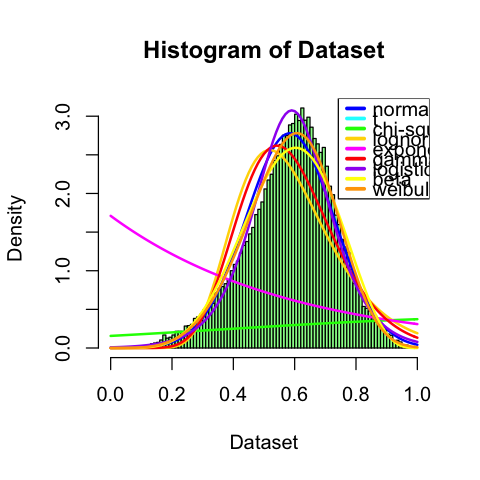

In [31]:
# include other distributions here
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic",
    "beta",
    "weibull"
)
Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE,
    FALSE,
    FALSE
)
Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis,
    dbeta,
    dweibull
)

Distribution_color = c(
     "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple",
    "yellow",
    "orange"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue",   lwd=2, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan",   lwd=2, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green",  lwd=2, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ),   col="gold",   lwd=2, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),           col="magenta",lwd=2, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),   col="red",    lwd=2, add=TRUE )
    if (dist_name == "logistic" )   curve( dlogis(x, p[1], p[2] ),   col="purple", lwd=2, add=TRUE )
    if (dist_name == "beta" )       curve( dbeta(x, p[1], p[2]  ),   col="yellow", lwd=2, add=TRUE )
    if (dist_name == "weibull" )    curve( dweibull(x, p[1], p[2] ), col="orange", lwd=2, add=TRUE )
}

n = length(movies$rating)  #  These ratings are integers between 0 and 10, inclusive
n
 
UnroundedRatings = movies$rating + runif(n)
range(UnroundedRatings)
#  The range of (Ratings + UniformNoise) should be the open interval (0,11)
 
RescaledRatings = UnroundedRatings / 11.0
 
#hist( RescaledRatings, probability=TRUE, col="palegreen", breaks=seq(0,1, by=0.01) )
range(RescaledRatings)
# These range of these rescaled ratings should be the open interval (0,1)
        

Dataset = RescaledRatings  

    
Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }
    
    Dataset_is_between_0and1 = !any(Dataset < 0 ) && !any(Dataset > 1 )
    if (!Dataset_is_between_0and1){
        cat("Dataset is not between 0 and 1\n")
    }
    

    hist( Dataset, probability=TRUE, col="palegreen", breaks=seq(0,1, by=0.01) )
    
    # display a histogram for each column Dataset
    
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )
    
    dist_name_test = Distribution_name[1]
    if (Distribution_can_have_negative_values[1] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative


            if (dist_name_test == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name_test,
                                                 list(df=2), method="BFGS" ) )
            }
            else if(dist_name_test == "beta"){
                if (Dataset_is_between_0and1){
                    fit = suppressWarnings( fitdistr( Dataset, dist_name, start=list(shape1=1, shape2=1)) )
                }
            }
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name_test ) )
            }
    
    fitted_parameters_test = fit$estimate
    log_likelihood_test = fit$loglik
    parameter_value_string = paste(round(fitted_parameters_test), collapse=" ")
    parameters_test = fitted_parameters_test
    x1=round(parameters[0], 5)
    x2=round(parameters[1], 5)
    x3=round(parameters[2], 5)
    x4=round(parameters[3], 5)
    }
    
    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                                 list(df=2), method="BFGS" ) )
            } 
            else if(dist_name == "beta" ){
                if (Dataset_is_between_0and1){
                    fit = suppressWarnings( fitdistr( Dataset, dist_name, start=list(shape1=1, shape2=1)) )
                }
                    
            }
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste((fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
            parameters = fitted_parameters
            log_likelihood = round(log_likelihood)
              if (log_likelihood>log_likelihood_test){
                log_likelihood_test = log_likelihood
                dist_name_test = dist_name
                x1=round(parameters[0], 5)
                x2=round(parameters[1], 5)
                x3=round(parameters[2], 5)
                x4=round(parameters[3], 5)
                if (is.na(x3)){
                    x3 = " "
                }
                if(is.na(x4)){
                    x4 = " "
                }
            }
            
        }
    }
Table2 = cbind( dist_name_test, x1, x2, x3, x4)
write.table(Table2, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

### Problem 2 - Question 7

In [32]:
library(moments)
skew2 = skewness(movies$rating, na.rm = FALSE)
skew2 = round(skew2, 5)
skew2
Skewness = cbind( "skewness", skew2)
write.table(Skewness, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

[1] -0.40571

### Problem 2 - Question 8

In [33]:
kurt2 = kurtosis(movies$rating, na.rm = FALSE)
kurt2 = kurt2-3
kurt2 = round(kurt2, 5)
kurt2
Kurtosis = cbind( "kurtosis", kurt2)
write.table(Kurtosis, file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

[1] 0.11577

# Problem 3: Answer two Multiple-Answer questions about the Gamma distribution

<ul><li><b>Question 9:</b> Give the number of the following expressions that
is a formula for the <b>skewness of the Gamma distribution</b>
with parameters $\alpha > 0$, $\beta > 0$:
<br/><br/>
(<b>1</b>) $\alpha/\beta$ <br/>
(<b>2</b>) $\alpha - \beta$ <br/>
(<b>3</b>) $\sqrt{\alpha/\beta}$ <br/>
(<b>4</b>) $\sqrt{\alpha\beta}/2$ <br/>
(<b>5</b>) $2/\sqrt{\alpha}$ <br/>
(<b>6</b>) $6/\alpha$ <br/>
(<b>7</b>) $\log(\alpha)/\beta$ <br/>
(<b>8</b>) None of the above <br/><br/>
</li><li><b>Question 10:</b> <b>True or False:</b>
the Gamma distribution is not negatively skewed, for any parameter values
$\alpha > 0$,
$\beta > 0$.
<br/><br/>
</li></ul>
(Again, for this assignment please consider only the usual  <a href="http://wikipedia.org/en/Gamma_distribution">Gamma Distribution</a>,
defined for $x>0$.)
<br/><br/>
Hint:  the skewness measure is the result of an integral for $E[((x-\mu)/\sigma)^3]$,
so both of these questions could be answered with a symbolic algebra system,
like <a href="http://sympy.org">SymPy</a> or
<a href="http://wolframalpha.com">Wolfram Alpha</a>.
Some online resources also might give a formula for skewness.

### Problem 3 - Question 9

In [34]:
#Ans: (5) - 2/sqrt(a)
write.table("5", file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

### Problem 3 - Question 10

In [35]:
#Ans: True
write.table("True ", file="HW2_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

# Finally:  Produce a CSV file "HW2_output.csv" including your answers

## Your output CSV file "HW2_output.csv" should look like this:

<p style="color:blue;">
If your program had been given the Table above as input,
it should print the following CSV file, a table with 10 rows, and three columns:
</p>
<pre>
lognormal,5.55555,1.11111
skewness,2.22222,
kurtosis,3.33333,
Batman: The Dark Knight,7.77777,8.88888
Batman v Superman: Dawn of Justice,1.22222,9.88888
lognormal,5.22222,1.44444
skewness,2.55555,
kurtosis,3.44444,
1,,
False,,
</pre>
<p style="color:blue;">
<i>There should be NO header line in this file.</i>
<br/><br/>
There should be 10 rows, one for each question.  Each row should have three fields.
<br/><br/>
You can enter any text description of a distribution, such as <tt>lognormal</tt>
or <tt>beta</tt> or <tt>Beta</tt> or whatever.
<br/>
However: the <tt>lognormal</tt> distribution is just provided as an example;
it is not a good description of Rating distributions.
Also: do not use the <tt>gamma</tt> distribution.
</p>

# Submit your output CSV file and your notebook on CCLE.
<p style="color:blue;">
Upload your .csv file for this assignment,
and also upload your .ipynb file (to show your work).  Both files are required.
</p>